# Running Classifies on the Standard Deviation Normalised Data

We will now try training and running the following classifiers on using the standard deviation normalised data:

 * Gaussian Maximum Likelihood
 * Support Vector Machines
 * Random Forests
 * Extra Tress
 * Graidient Boosted Trees
 * Neural Network
 * K Nearest Neighbour
 
## Running Notebook

The notebook has been run and saved with the outputs so you can see what the outputs should be and so the notebook and be browsed online without having to run the notebook for it to make sense. 

If you are running the notebook for yourself it is recommended that you clear the existing outputs which can be done by running one of the following options depending on what system you are using:

**Jupyter-lab**:

> \> _Edit_ \> _'Clear All Outputs'_

**Jupyter-notebook**:

> \> _Cell_ \> _'All Outputs'_ \> _Clear_


# 1. Import Modules

In [1]:
import os

import rsgislib.classification.classsklearn
import rsgislib.tools.utils
from rsgislib.classification import ClassInfoObj
from rsgislib.imageutils import ImageBandInfo

# 2. Import Scikit-Learn Classifiers

In [2]:
# Gaussian Maximum Likelihood
# Gradient Boosting
# Extra Trees
# Random Forests
from sklearn.ensemble import (
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.naive_bayes import GaussianNB

# K- Nearest Neightbour
from sklearn.neighbors import KNeighborsClassifier

# Neural Network
from sklearn.neural_network import MLPClassifier

# Support Vector Machines
from sklearn.svm import SVC

# 3. Create Output Directory

In [3]:
out_cls_dir = "cls_sdnorm_results"
if not os.path.exists(out_cls_dir):
    os.mkdir(out_cls_dir)

# 4. Define the Input Image

In [4]:
input_img = "norm_images/sen2_20180629_t30uvd_orb037_osgb_stdsref_norm_stddev.tif"
imgs_info = []
imgs_info.append(
    ImageBandInfo(
        file_name=input_img, name="sen2", bands=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    )
)

valid_img = "../data/sen2_20180629_t30uvd_orb037_osgb_stdsref_20m_vmsk.tif"

# 5. Define Sample Data and Class Colours

In [5]:
cls_smpl_info = dict()
cls_smpl_info["Artificial_Surfaces"] = ClassInfoObj(
    id=0,
    out_id=1,
    train_file_h5="training_data/artificial_surfaces_sdnorm_smpls_train.h5",
    test_file_h5="training_data/artificial_surfaces_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/artificial_surfaces_sdnorm_smpls_valid.h5",
    red=160,
    green=160,
    blue=160,
)
cls_smpl_info["Bare_Rock_Sand"] = ClassInfoObj(
    id=1,
    out_id=2,
    train_file_h5="training_data/bare_rock_sand_sdnorm_smpls_train.h5",
    test_file_h5="training_data/bare_rock_sand_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/bare_rock_sand_sdnorm_smpls_valid.h5",
    red=100,
    green=100,
    blue=100,
)
cls_smpl_info["Bracken"] = ClassInfoObj(
    id=2,
    out_id=3,
    train_file_h5="training_data/bracken_sdnorm_smpls_train.h5",
    test_file_h5="training_data/bracken_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/bracken_sdnorm_smpls_valid.h5",
    red=235,
    green=146,
    blue=38,
)
cls_smpl_info["Conifer_Forest"] = ClassInfoObj(
    id=3,
    out_id=4,
    train_file_h5="training_data/conifer_forest_sdnorm_smpls_train.h5",
    test_file_h5="training_data/conifer_forest_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/conifer_forest_sdnorm_smpls_valid.h5",
    red=2,
    green=97,
    blue=16,
)
cls_smpl_info["Deciduous_Forest"] = ClassInfoObj(
    id=4,
    out_id=5,
    train_file_h5="training_data/deciduous_forest_sdnorm_smpls_train.h5",
    test_file_h5="training_data/deciduous_forest_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/deciduous_forest_sdnorm_smpls_valid.h5",
    red=50,
    green=184,
    blue=69,
)
cls_smpl_info["Grass_Long"] = ClassInfoObj(
    id=5,
    out_id=6,
    train_file_h5="training_data/grass_long_sdnorm_smpls_train.h5",
    test_file_h5="training_data/grass_long_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/grass_long_sdnorm_smpls_valid.h5",
    red=150,
    green=227,
    blue=18,
)
cls_smpl_info["Grass_Short"] = ClassInfoObj(
    id=6,
    out_id=7,
    train_file_h5="training_data/grass_short_sdnorm_smpls_train.h5",
    test_file_h5="training_data/grass_short_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/grass_short_sdnorm_smpls_valid.h5",
    red=194,
    green=219,
    blue=66,
)
cls_smpl_info["NonPhoto_Veg"] = ClassInfoObj(
    id=7,
    out_id=8,
    train_file_h5="training_data/nonphoto_veg_sdnorm_smpls_train.h5",
    test_file_h5="training_data/nonphoto_veg_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/nonphoto_veg_sdnorm_smpls_valid.h5",
    red=98,
    green=225,
    blue=227,
)
cls_smpl_info["Scrub"] = ClassInfoObj(
    id=8,
    out_id=9,
    train_file_h5="training_data/scrub_sdnorm_smpls_train.h5",
    test_file_h5="training_data/scrub_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/scrub_sdnorm_smpls_valid.h5",
    red=0,
    green=80,
    blue=0,
)
cls_smpl_info["Water"] = ClassInfoObj(
    id=9,
    out_id=10,
    train_file_h5="training_data/water_sdnorm_smpls_train.h5",
    test_file_h5="training_data/water_sdnorm_smpls_test.h5",
    valid_file_h5="training_data/water_sdnorm_smpls_valid.h5",
    red=0,
    green=0,
    blue=255,
)

# 6. Initialise `dict` for Storing Train and Test Statistics

In [6]:
acc_stats = dict()

# 7. Apply Gaussian Maximum Likelihood

## 7.1 Create the Classifier

In [7]:
# Create
skclf = GaussianNB()

## 7.2 Train the Classifier

In [8]:
# Train the classifier
(
    sdnorm_train_acc,
    sdnorm_test_acc,
) = rsgislib.classification.classsklearn.train_sklearn_classifier(cls_smpl_info, skclf)

acc_stats["sdnorm_ml"] = {"test": sdnorm_test_acc, "train": sdnorm_train_acc}

Training data size: 3540 x 10
Testing data size: 534 x 10
Training Classifier
Completed
Calc Classifier Accuracy
Classifier Train Score = 92.43%
Classifier Test Score = 92.7%


## 7.3 Apply Classifier

In [9]:
out_cls_ml_img = os.path.join(out_cls_dir, "cls_ml_sdnorm.kea")
rsgislib.classification.classsklearn.apply_sklearn_classifier(
    cls_smpl_info,
    skclf,
    valid_img,
    1,
    imgs_info,
    out_cls_ml_img,
    "KEA",
    class_clr_names=True,
)

Applying the Classifier


  0%|          | 0/100 [00:00<?, ?it/s]

Completed
Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.

Apply Colour to class 'Artificial_Surfaces'
Apply Colour to class 'Bare_Rock_Sand'
Apply Colour to class 'Bracken'
Apply Colour to class 'Conifer_Forest'
Apply Colour to class 'Deciduous_Forest'
Apply Colour to class 'Grass_Long'
Apply Colour to class 'Grass_Short'
Apply Colour to class 'NonPhoto_Veg'
Apply Colour to class 'Scrub'
Apply Colour to class 'Water'


# 8. Apply Support Vector Machines

## 8.1 Create the Classifier

In [10]:
# Create SVM instance using a linear kernal
skclf = SVC(kernel="linear")

## 8.2 Train the Classifier

In [11]:
# Train the classifier
(
    sdnorm_train_acc,
    sdnorm_test_acc,
) = rsgislib.classification.classsklearn.train_sklearn_classifier(cls_smpl_info, skclf)

acc_stats["sdnorm_svm"] = {"test": sdnorm_test_acc, "train": sdnorm_train_acc}

Training data size: 3540 x 10
Testing data size: 534 x 10
Training Classifier
Completed
Calc Classifier Accuracy
Classifier Train Score = 99.18%
Classifier Test Score = 98.69%


## 8.3 Apply Classifier

In [12]:
out_cls_svm_img = os.path.join(out_cls_dir, "cls_svm_sdnorm.kea")
rsgislib.classification.classsklearn.apply_sklearn_classifier(
    cls_smpl_info,
    skclf,
    valid_img,
    1,
    imgs_info,
    out_cls_svm_img,
    "KEA",
    class_clr_names=True,
)

Applying the Classifier


  0%|          | 0/100 [00:00<?, ?it/s]

Completed
Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.

Apply Colour to class 'Artificial_Surfaces'
Apply Colour to class 'Bare_Rock_Sand'
Apply Colour to class 'Bracken'
Apply Colour to class 'Conifer_Forest'
Apply Colour to class 'Deciduous_Forest'
Apply Colour to class 'Grass_Long'
Apply Colour to class 'Grass_Short'
Apply Colour to class 'NonPhoto_Veg'
Apply Colour to class 'Scrub'
Apply Colour to class 'Water'


# 9. Apply Random Forests

## 9.1 Create the Classifier

In [13]:
# Create Random Forests Classifier Instance with 100 estimators
skclf = RandomForestClassifier(n_estimators=100)

## 9.2 Train the Classifier

In [14]:
# Train the classifier
(
    sdnorm_train_acc,
    sdnorm_test_acc,
) = rsgislib.classification.classsklearn.train_sklearn_classifier(cls_smpl_info, skclf)

acc_stats["sdnorm_rf"] = {"test": sdnorm_test_acc, "train": sdnorm_train_acc}

Training data size: 3540 x 10
Testing data size: 534 x 10
Training Classifier
Completed
Calc Classifier Accuracy
Classifier Train Score = 100.0%
Classifier Test Score = 97.57%


## 9.3 Apply Classifier

In [15]:
out_cls_rf_img = os.path.join(out_cls_dir, "cls_rf_sdnorm.kea")
rsgislib.classification.classsklearn.apply_sklearn_classifier(
    cls_smpl_info,
    skclf,
    valid_img,
    1,
    imgs_info,
    out_cls_rf_img,
    "KEA",
    class_clr_names=True,
)

Applying the Classifier


  0%|          | 0/100 [00:00<?, ?it/s]

Completed
Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.

Apply Colour to class 'Artificial_Surfaces'
Apply Colour to class 'Bare_Rock_Sand'
Apply Colour to class 'Bracken'
Apply Colour to class 'Conifer_Forest'
Apply Colour to class 'Deciduous_Forest'
Apply Colour to class 'Grass_Long'
Apply Colour to class 'Grass_Short'
Apply Colour to class 'NonPhoto_Veg'
Apply Colour to class 'Scrub'
Apply Colour to class 'Water'


# 10. Apply Extra Trees

## 10.1 Create the Classifier

In [16]:
# Create Extra Trees Classifier Instance with 100 estimators
skclf = ExtraTreesClassifier(n_estimators=100)

## 10.2 Train the Classifier

In [17]:
# Train the classifier
(
    sdnorm_train_acc,
    sdnorm_test_acc,
) = rsgislib.classification.classsklearn.train_sklearn_classifier(cls_smpl_info, skclf)

acc_stats["sdnorm_et"] = {"test": sdnorm_test_acc, "train": sdnorm_train_acc}

Training data size: 3540 x 10
Testing data size: 534 x 10
Training Classifier
Completed
Calc Classifier Accuracy
Classifier Train Score = 100.0%
Classifier Test Score = 98.13%


## 10.3 Apply Classifier

In [18]:
out_cls_et_img = os.path.join(out_cls_dir, "cls_et_sdnorm.kea")
rsgislib.classification.classsklearn.apply_sklearn_classifier(
    cls_smpl_info,
    skclf,
    valid_img,
    1,
    imgs_info,
    out_cls_et_img,
    "KEA",
    class_clr_names=True,
)

Applying the Classifier


  0%|          | 0/100 [00:00<?, ?it/s]

Completed
Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.

Apply Colour to class 'Artificial_Surfaces'
Apply Colour to class 'Bare_Rock_Sand'
Apply Colour to class 'Bracken'
Apply Colour to class 'Conifer_Forest'
Apply Colour to class 'Deciduous_Forest'
Apply Colour to class 'Grass_Long'
Apply Colour to class 'Grass_Short'
Apply Colour to class 'NonPhoto_Veg'
Apply Colour to class 'Scrub'
Apply Colour to class 'Water'


# 11. Apply Gradient Boosting

## 11.1 Create the Classifier

In [19]:
# Create Gradient Boosting Classifier Instance with 100 estimators
skclf = GradientBoostingClassifier(n_estimators=100)

## 11.2 Train the Classifier

In [20]:
# Train the classifier
(
    sdnorm_train_acc,
    sdnorm_test_acc,
) = rsgislib.classification.classsklearn.train_sklearn_classifier(cls_smpl_info, skclf)

acc_stats["sdnorm_gbt"] = {"test": sdnorm_test_acc, "train": sdnorm_train_acc}

Training data size: 3540 x 10
Testing data size: 534 x 10
Training Classifier
Completed
Calc Classifier Accuracy
Classifier Train Score = 100.0%
Classifier Test Score = 97.94%


## 11.3 Apply Classifier

In [21]:
out_cls_gbt_img = os.path.join(out_cls_dir, "cls_gbt_sdnorm.kea")
rsgislib.classification.classsklearn.apply_sklearn_classifier(
    cls_smpl_info,
    skclf,
    valid_img,
    1,
    imgs_info,
    out_cls_gbt_img,
    "KEA",
    class_clr_names=True,
)

Applying the Classifier


  0%|          | 0/100 [00:00<?, ?it/s]

Completed
Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.

Apply Colour to class 'Artificial_Surfaces'
Apply Colour to class 'Bare_Rock_Sand'
Apply Colour to class 'Bracken'
Apply Colour to class 'Conifer_Forest'
Apply Colour to class 'Deciduous_Forest'
Apply Colour to class 'Grass_Long'
Apply Colour to class 'Grass_Short'
Apply Colour to class 'NonPhoto_Veg'
Apply Colour to class 'Scrub'
Apply Colour to class 'Water'


# 12. Apply Neural Network

## 12.1 Create the Classifier

In [22]:
# Create Neural Network Classifier Instance
skclf = MLPClassifier()

## 12.2 Train the Classifier

In [23]:
# Train the classifier
(
    sdnorm_train_acc,
    sdnorm_test_acc,
) = rsgislib.classification.classsklearn.train_sklearn_classifier(cls_smpl_info, skclf)

acc_stats["sdnorm_nn"] = {"test": sdnorm_test_acc, "train": sdnorm_train_acc}

Training data size: 3540 x 10
Testing data size: 534 x 10
Training Classifier
Completed
Calc Classifier Accuracy
Classifier Train Score = 96.07%
Classifier Test Score = 95.13%


## 12.3 Apply Classifier

In [24]:
out_cls_nn_img = os.path.join(out_cls_dir, "cls_nn_sdnorm.kea")
rsgislib.classification.classsklearn.apply_sklearn_classifier(
    cls_smpl_info,
    skclf,
    valid_img,
    1,
    imgs_info,
    out_cls_nn_img,
    "KEA",
    class_clr_names=True,
)

Applying the Classifier


  0%|          | 0/100 [00:00<?, ?it/s]

Completed
Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.

Apply Colour to class 'Artificial_Surfaces'
Apply Colour to class 'Bare_Rock_Sand'
Apply Colour to class 'Bracken'
Apply Colour to class 'Conifer_Forest'
Apply Colour to class 'Deciduous_Forest'
Apply Colour to class 'Grass_Long'
Apply Colour to class 'Grass_Short'
Apply Colour to class 'NonPhoto_Veg'
Apply Colour to class 'Scrub'
Apply Colour to class 'Water'


# 13. Apply K-Nearest Neighbour

**WARNING** this classifier takes a long time to apply... Probably about 90 minutes! There only run this classifier if you want to wait that long.

## 13.1 Create the Classifier

In [25]:
# Create K-Nearest Neighbour Classifier Instance
skclf = KNeighborsClassifier()

## 13.2 Train the Classifier

In [26]:
# Train the classifier
(
    sdnorm_train_acc,
    sdnorm_test_acc,
) = rsgislib.classification.classsklearn.train_sklearn_classifier(cls_smpl_info, skclf)

acc_stats["sdnorm_knn"] = {"test": sdnorm_test_acc, "train": sdnorm_train_acc}

applied_knn = False

Training data size: 3540 x 10
Testing data size: 534 x 10
Training Classifier
Completed
Calc Classifier Accuracy
Classifier Train Score = 98.76%
Classifier Test Score = 98.13%


## 13.3 Apply Classifier

**WARNING** takes a long time to apply!

In [27]:
%%script false --no-raise-error
# If you want to run this cell comment out line above. 


out_cls_knn_img = os.path.join(out_cls_dir, "cls_knn_sdnorm.kea")
rsgislib.classification.classsklearn.apply_sklearn_classifier(
    cls_smpl_info,
    skclf,
    valid_img,
    1,
    imgs_info,
    out_cls_knn_img,
    "KEA",
    class_clr_names=True,
)

applied_knn = True

# 14. Export Train and Test Accuracy Statistics

In [28]:
import pprint

pprint.pprint(acc_stats)

{'sdnorm_et': {'test': 0.9812734082397003, 'train': 1.0},
 'sdnorm_gbt': {'test': 0.9794007490636704, 'train': 1.0},
 'sdnorm_knn': {'test': 0.9812734082397003, 'train': 0.9875706214689266},
 'sdnorm_ml': {'test': 0.9269662921348315, 'train': 0.9242937853107345},
 'sdnorm_nn': {'test': 0.951310861423221, 'train': 0.9607344632768362},
 'sdnorm_rf': {'test': 0.9756554307116105, 'train': 1.0},
 'sdnorm_svm': {'test': 0.9868913857677902, 'train': 0.9918079096045198}}


In [29]:
out_acc_stats_json = os.path.join(out_cls_dir, "sdnorm_test_train_acc_stats.json")
rsgislib.tools.utils.write_dict_to_json(acc_stats, out_acc_stats_json)

# 14.1 Create Table of Test and Train Scores

In [30]:
import pandas

cls_acc_df = pandas.DataFrame.from_dict(acc_stats, orient="index")
cls_acc_df

,test,train
sdnorm_ml,0.926966,0.924294
sdnorm_svm,0.986891,0.991808
sdnorm_rf,0.975655,1.000000
sdnorm_et,0.981273,1.000000
sdnorm_gbt,0.979401,1.000000
sdnorm_nn,0.951311,0.960734
sdnorm_knn,0.981273,0.987571


# 15. Visualise Classification Results

Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250


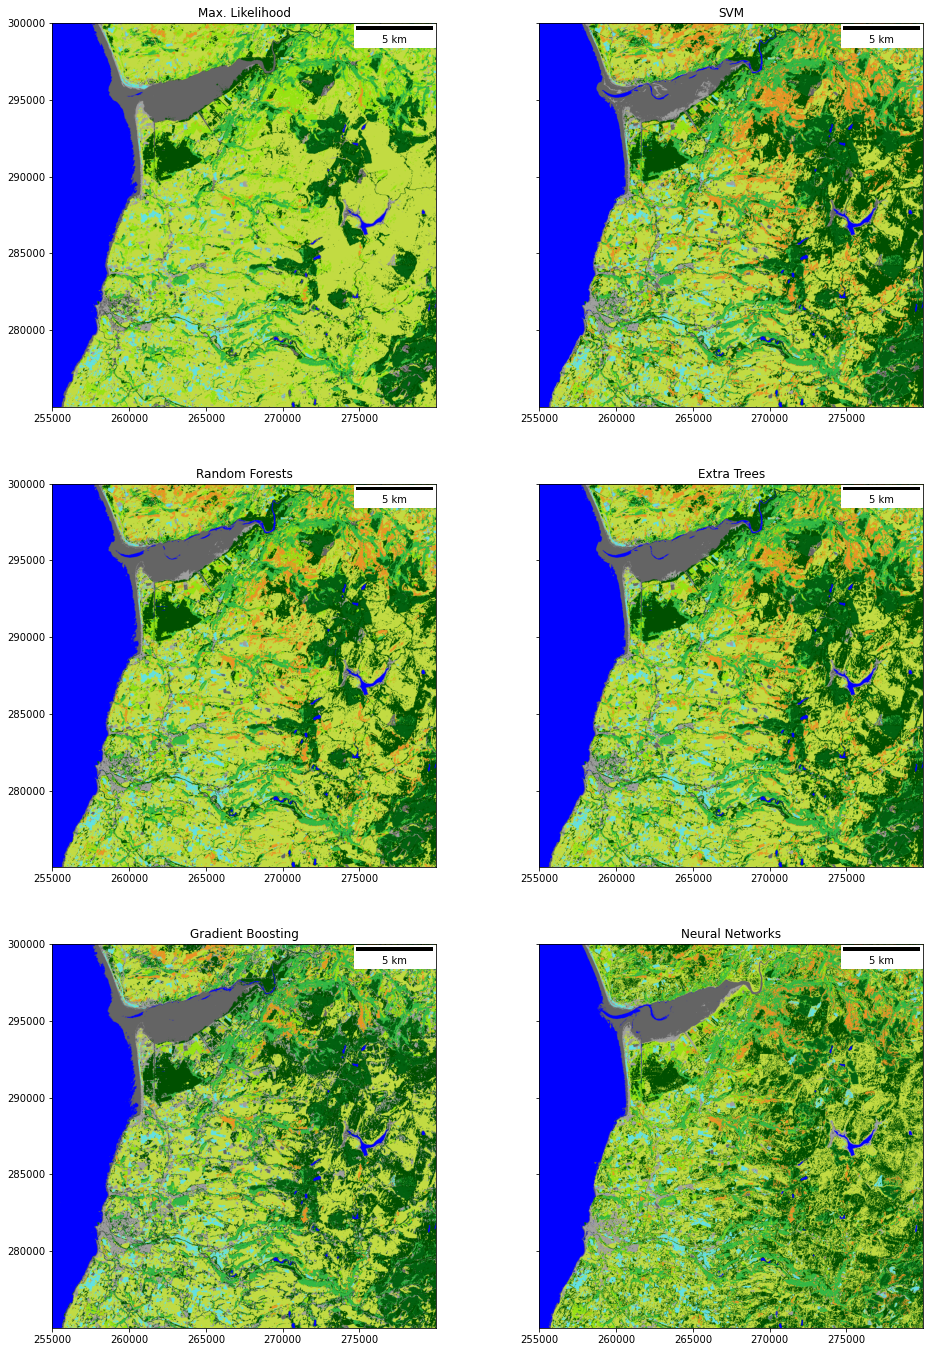

In [31]:
# Import the matplotlib plotting module and set it to work within
# a notebook environment.
%matplotlib inline
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Import the RSGISLib plotting module for reading the
# image data into numpy arrays for display.
import rsgislib.tools.mapping

# Define a bbox for the subset to be displayed
# sub_img_bbox = [275000, 300000, 275000, 300000]
sub_img_bbox = [255000, 280000, 275000, 300000]
# sub_img_bbox = [295000, 300000, 295000, 300000]

# Create lists of the classification images and the titles the
# plots of those classifications.
cls_rslts = [
    out_cls_ml_img,
    out_cls_svm_img,
    out_cls_rf_img,
    out_cls_et_img,
    out_cls_gbt_img,
    out_cls_nn_img,
]
cls_titles = [
    "Max. Likelihood",
    "SVM",
    "Random Forests",
    "Extra Trees",
    "Gradient Boosting",
    "Neural Networks",
]

# Create the matplotlib figure - in this case a grid of 2 x 3.
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(
    3, 2, figsize=(16, 24), sharey=True
)
# Create a list for the 6 axes used for the plot
plot_axes = [ax1, ax2, ax3, ax4, ax5, ax6]

# zip the three lists together so that they are looped
# through together providing the image, title and axis
# for the plot for each one in turn.
for ax, cls_rslt, cls_title in zip(plot_axes, cls_rslts, cls_titles):
    rsgislib.tools.mapping.create_thematic_raster_map(ax, cls_rslt, bbox=sub_img_bbox)
    ax.title.set_text(cls_title)

# 16. Conclusions

Comparing the accuracies from the testing and training samples the main thing we notice is that the accuracies are all very similar and also very high. However, when looking at the maps which have been produced we can see that they all look quite different! Therefore, why are the testing and training results so similar to one another?

 1. The samples used for the classification are an example of a poorly defined datasets.
 2. The poorly defined dataset suffers from spatial autocorrelation where neighbouring pixels are used for training and testing.
 3. The number of samples used is acutally quite small. Add more training samples for the classes will low number of samples would be helpful
 4. The spatial distribution of the samples is poor. The training data has been defined in a lazy manner where some broad polygons have been defined in just a few locations rather than distributed across the scene and therefore sampling more of the spectral variation within the scenes. 

